# Condiciones iniciales en cuerdas: Series de Fourier


En este Colab vamos a ver de forma numérica la solución propuesta para el ejercicio realizado en la clase del 12/04.

Una cuerda con ambos extremos libres sometida a una tensión $T_0$ y con densidad de masa $\mu$. En el instante $t=0$ se la da a la cuerda la forma de la figura y se la suelta.


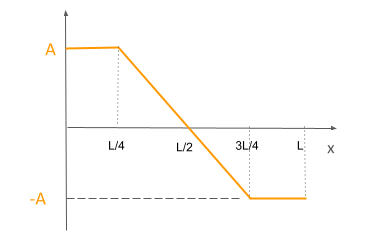

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab, mlab, pyplot
from matplotlib import animation, rc 
rc('animation', html='html5')
from IPython.display import HTML
import ipywidgets as iwy

In [ ]:
# Parámetros Físicos 
L = 1      #m
mu = 0.2    #kg/m
T = 120     #N
A = 0.2  #m
v = np.sqrt(T/mu)

La solución mas general para una cuerda con extremos libres es:

$$ \psi (x,t) = \sum_{p=1}^∞ = A^{(p)} \cos(k_p x) cos(\omega_p t + \theta_p) $$

con $k_p = \frac{p\pi}{L}$ y $A^{(p)}, \theta_p$ se determinan por las condiciones iniciales. 

In [ ]:
#Primer k, primera frecuencia: modo fundamental
k1 = np.pi/L
omega1 = v*k1
print(k1, omega1, 2*np.pi/omega1)

3.141592653589793 76.95298980971184 0.08164965809277261


In [ ]:
def kp(q):
  k_p = q*np.pi/L
  return k_p

def omegap(q):
  omega_p = v*kp(q)
  return omega_p
  
def periodop(q): 
  T_p = 2*np.pi/omegap(q)
  return T_p
  

In [ ]:
print(kp(2),omegap(2),periodop(2)) #notar que a medida que aumenta p disminuye el período

6.283185307179586 153.90597961942368 0.040824829046386304


Las condiciones iniciales son:
$$\dot{\psi}(x,t=0) = 0$$
$$ \psi (x, t=0) = \left\{\begin{matrix}
A & si & 0\leq x \leq L/4\\ 
-\frac{4A}{L}x +2A & si &L/4 \leq x \leq 3L/4 \\
-A & si & 3L/4 \leq x \leq L
\end{matrix}\right. $$

Encontramos que $\theta_q = 0$ $\forall q $ y:

$$ A^{(q)}= \frac{8A}{(q\pi)^2} \cos (\frac{q\pi}{4})[1-(-1)^q]$$

In [ ]:
#Amplitudes de cada modo:
def Ap(q):
  A_p = (8*A/(q*np.pi)**2 )*np.cos(q*np.pi/4)*(1-(-1)**q)
  return A_p

In [ ]:
A_1 = Ap(1)
A_2 = Ap(2)
A_3 = Ap(3)
A_4 = Ap(4)
A_5 = Ap(5)
A_6 = Ap(6)
print("Las constantes de los primeros modos son:",A_1, A_2, A_3, A_4,A_5,A_6)

Las constantes de los primeros modos son: 0.22926366730030254 0.0 -0.025473740811144722 -0.0 -0.009170546692012104 -0.0


In [ ]:
Ap(101) #vean que a medida que aumenta q la amplitud de cada modo es cada vez más chica, pueden verlo de la expresión que va como 1/q² (asegura convergencia)

-2.2474626732702975e-05

In [ ]:
#Veamos la configuración de los primeros modos:
x = np.linspace(0,L,100)

La amplitud con la que aparece este modo para reconstruir la CI: 0.22926366730030254


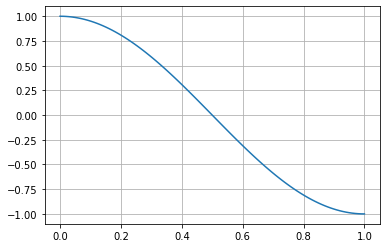

In [ ]:
#Modo 1: 
plt.plot(x,np.cos(kp(1)*x))
plt.grid()
print("La amplitud con la que aparece este modo para reconstruir la CI:",Ap(1))

La amplitud con la que aparece este modo para reconstruir la CI: 0.0


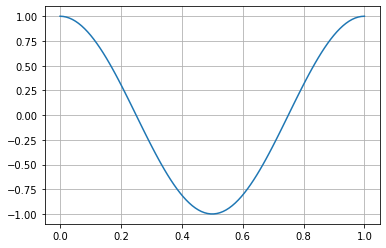

In [ ]:
#Modo 2:
plt.plot(x, np.cos(kp(2)*x))
plt.grid()
print("La amplitud con la que aparece este modo para reconstruir la CI:",Ap(2))

La amplitud con la que aparece este modo para reconstruir la CI: -0.025473740811144722


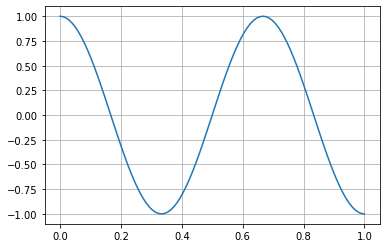

In [ ]:
#Modo 3:
plt.plot(x,np.cos(kp(3)*x))
plt.grid()
print("La amplitud con la que aparece este modo para reconstruir la CI:",Ap(3)) #Notar signo!

La amplitud con la que aparece este modo para reconstruir la CI: -0.0


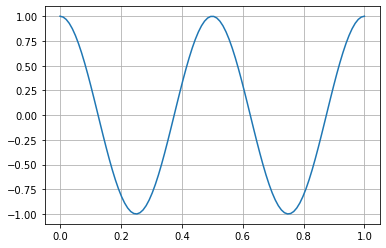

In [ ]:
#Modo 4:
plt.plot(x,np.cos(kp(4)*x))
plt.grid()
print("La amplitud con la que aparece este modo para reconstruir la CI:",Ap(4))

Notar que los modos deben respetar la condición de contorno. Se corrobora también que los modos cuyas amplitudes son cero son los modos simétricos con respecto a L/2. Los modos que sobreviven -impares- son antisimétricos con respecto a L/2, al igual que la condición inicial. 

In [ ]:
def modo_p(q):
  y = Ap(q)*np.cos(kp(q)*x)
  return y

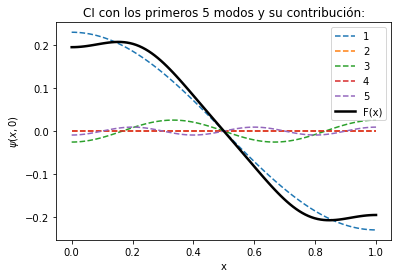

In [ ]:
#Reconstruyamos la condición inicial usando los primeros modos:
psi = 0
for q in range(1,6):
  psi = psi + modo_p(q)
  plt.plot(x,modo_p(q),"--", label=str(q))
plt.plot(x, psi, c="k",linewidth=2.5, label="F(x)")
plt.legend()
plt.title("CI con los primeros 5 modos y su contribución:")
plt.xlabel("x")
plt.ylabel("$\psi(x,0)$")
plt.show()

In [ ]:
#Sumemos más modos:
def Fourier(q):
  psi = 0
  for i in range(1,q+1):
    psi = psi + modo_p(i)
  return psi

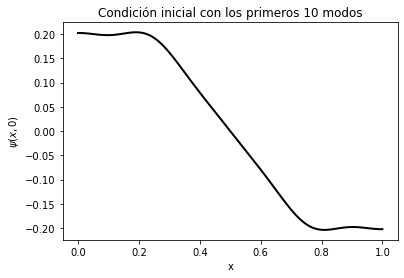

In [ ]:
psi_f = Fourier(10)
plt.plot(x,psi_f,"k", linewidth=2)
plt.xlabel("x")
plt.ylabel("$\psi(x,0)$")
plt.title("Condición inicial con los primeros 10 modos")
plt.show()

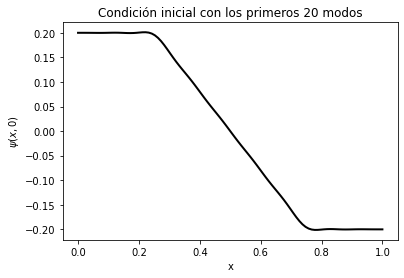

In [ ]:
psi_f = Fourier(20)
plt.plot(x,psi_f,"k", linewidth=2)
plt.xlabel("x")
plt.ylabel("$\psi(x,0)$")
plt.title("Condición inicial con los primeros 20 modos")
plt.show()

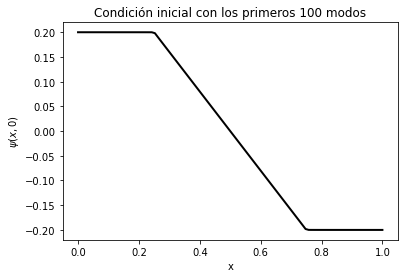

In [ ]:
psi_f = Fourier(200)
plt.plot(x,psi_f,"k", linewidth=2)
plt.xlabel("x")
plt.ylabel("$\psi(x,0)$")
plt.title("Condición inicial con los primeros 100 modos")
plt.show()

Una función periódica pueder escribirse en una base de cosenos y senos mediante su desarrollo en series de Fourier. La igualdad es exacta cuando consideramos la suma de los infinitos términos, pero podemos ver numéricamente que si truncamos -nos quedamos con N términos- la sumatoria con N suficientemente grande es una buena aproximación de la función. ¿Cómo elijo ese N? Bueno, dependerá del error que quiera cometer, de la función que esté tomando (notar que lo que más le "cuesta" ajustar son los picos), etc. Como es casi todo desarrollo numérico, hay que tomar elecciones (sabiendo que error se comete!)

¿Cómo será la evolución del sistema en el tiempo? 
Veamos como se ve a un tiempo posterior:

In [ ]:
#Evolución temporal: calcula psi a un tiempo t (fijo) para N términos de la serie de Fourier
def ec_mov(N,t):
  psi = 0
  for q in range(1,N):
    psi = psi + modo_p(q)*np.cos(omegap(q)*t)
  return psi

Antes de ver en código cómo está la cuerda a un tiempo posterior, pensemos un poco.. Tenemos oscilaciones, ¿va a haber algún período en este movimiento? Bueno, tenemos las frecuencias de los modos: $\omega_p = v k_p = \frac{ q v \pi}{L}$.
Entonces..
$$\omega_1 = \frac{v\pi}{L}$$
$$\omega_2 = 2\frac{v\pi}{L} = 2\omega_1$$
$$\omega_3 = 3\frac{v\pi}{L} = 3\omega_1$$
$$\omega_4 = 4 \frac{v\pi}{L} = 4\omega_1$$

Vemos que todas las frecuencias de los modos permitidos son múltiplos de la frecuencia del fundamental $\omega_1$. Recordando que el período va como la inversa de la frecuencia, el período asociado a cada modo será un submúltiplo del período del fundamental. Entonces,¿cuál es el período del movimiento?

t1: 0


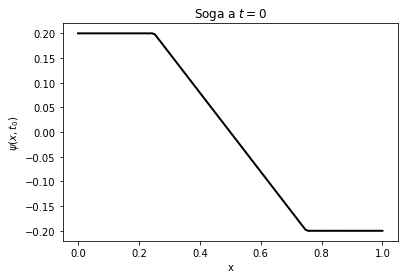

In [ ]:
t0 = 0
print("t1:",str(np.around(t0,3)))
plt.plot(x,ec_mov(100,t0),"k",linewidth=2)
plt.xlabel("x")
plt.ylabel("$\psi(x,t_0)$")
plt.title("Soga a $t=0$")
plt.show()

t1: 0.014


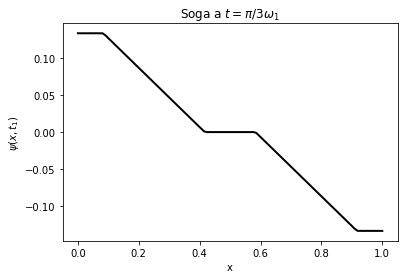

In [ ]:
t1 = np.pi/(3*omega1)
print("t1:",str(np.around(t1,3)))
plt.plot(x,ec_mov(100,t1),"k",linewidth=2)
plt.xlabel("x")
plt.ylabel("$\psi(x,t_1)$")
plt.title("Soga a $t=\pi/3\omega_1$")
plt.show()

t2: 0.041


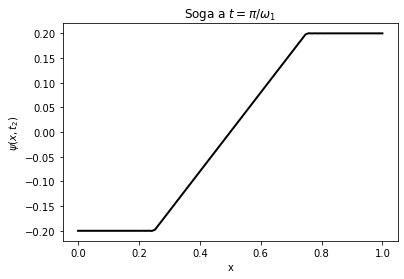

In [ ]:
t2 = np.pi/omega1
print("t2:",str(np.around(t2,3)))
plt.plot(x,ec_mov(100,t2),"k",linewidth=2)
plt.xlabel("x")
plt.ylabel("$\psi(x,t_2)$")
plt.title("Soga a $t=\pi/\omega_1$")
plt.show()

t3: 0.031


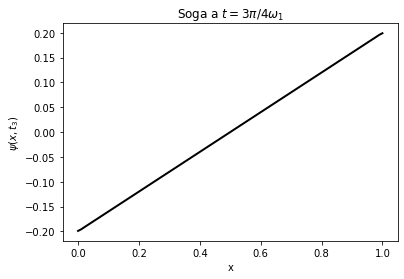

In [ ]:
t3 = 3*np.pi/4/omega1
print("t3:",str(np.around(t3,3)))
plt.plot(x,ec_mov(100,t3),"k",linewidth=2)
plt.xlabel("x")
plt.ylabel("$\psi(x,t_3)$")
plt.title("Soga a $t=3\pi/4\omega_1$")
plt.show()

t2: 0.082


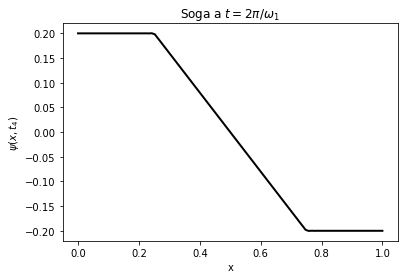

In [ ]:
t4 = periodop(1)
print("t2:",str(np.around(t4,3)))
plt.plot(x,ec_mov(100,t4),"k",linewidth=2)
plt.xlabel("x")
plt.ylabel("$\psi(x,t_4)$")
plt.title("Soga a $t=2\pi/\omega_1$")
plt.show()

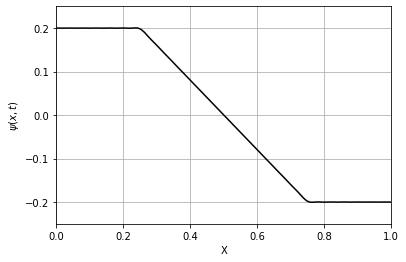

<Figure size 1080x360 with 0 Axes>

In [ ]:
fig, ax = plt.subplots();
plt.figure(figsize=(15, 5))
ax.set_xlabel('X')
ax.set_ylabel("$\psi(x,t)$")
ax.set_xlim([0,1])
ax.set_ylim([-0.25,0.25])
ax.grid(True)

linea, = ax.plot([],[],'-',color = 'k')
x=np.linspace(0, L, 100)
t=np.linspace(0,periodop(1),1000)
def Desplazamiento(i):
  psi_t = 0
  for p in range (1,50): #me quedo con 50 primeros modos
    psi_t = psi_t + modo_p(p)*np.cos(omegap(p)*t[i])
    
  linea.set_data(x, psi_t)
  return (linea,)
anim = animation.FuncAnimation(fig, Desplazamiento, frames=1000, interval=50)
anim

Fourier 😍